# SCS 3546 Week 10 - Speech and Music - Recognition and Synthesis

## Learning Objectives

- Use tools to extract features from audio
- Experiment with tools for analyzing and synthesizing human speech
- Explore the history of computer composition
- Work with neural nets for generating speech, sound and music

### Sound

- Sound is nothing more than ripples in the air: alternating bands of higher and lower air pressure that move from the source of the sound to your ears.
- If we record the air pressure at a point in space between a speaker and a listener and plot it as a function of time we would see a repeating wave-like pattern.  This is exactly what a microphone does: it is a tiny pressure gauge that records the variation in air pressure at a point in space.  The microphone in a digital recorder or computer records the fluctuations in air pressure as a number every few hundred thousandths of a second, creating a time series.  A time series like this is often referred to as a *signal*.


In [ ]:
# Let's generate a plot then spectrogram for the Star Wars Imperial March
# First, install librosa before running this cell:
# 1. Open a terminal/command window
# 2. conda config --add channels conda-forge
# 3. conda install librosa

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# Use IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [ ]:
audio_path = 'imperial_march.wav'

y, sr = librosa.load(audio_path) # y is the signal and sr is the sample rate (22050 for this file)
IPython.display.Audio(y, rate=sr)

In [ ]:
librosa.display.waveplot(y)

- The diagam above shows a plot of the signal i.e. a representation of the variation of air pressure around the microphone over time.
- We can easily load this into a Pandas Series.

In [ ]:
from pandas import Series

march = Series(y)
march[20000:20500]

In [ ]:
# Let's zoom in on a few hundredths of a second
march[20000:21000].plot()

### The Sound Spectrum

- An alternative way of thinking about sound is as a progression of mixtures of different frequencies of air vibration.  We perceive frequency as pitch: a vibration at twice the frequency of another we would hear as a sound an octave higher.
- When different frequencies are related by whole number ratios we usually perceive it as being a note at the lowest frequency in the mix, but having a different colour (timbre) than if we had just heard the lowest frequency tone alone.
- We can tell an oboe from a clarinet for example because their sounds have different combinations of these higher frequencies (called *overtones*) making them sound qualitatively different.
- The range of frequencies we can hear runs from about 20 cycles per second (also known as Hertz) up to about 20,000.
- We can visualize the amount of energy at each frequency over time using a diagram called a *spectrogram*.

In [ ]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

The diagram above shows how much energy there is in each frequency band over the 40 seconds that the music clip runs.  It is much like a player piano roll where low frequencies (pitches) are at the bottom and higher at the top.  The horizontal trails of dashes are the repeating notes of the march.  The frequency scale is logarithmic which matches how we hear: we perceive a frequency which is twice another to be one octave above it.

## Sound Files

### Audio Files

- Audio files contain a time series as above along with some metadata such as the sample rate.  The sample rate is the number of pressure readings taken per second.  The readings are relative to air at rest so they have a mean of about zero.
- Each data point (observation of air pressure) is called a *sample* (although the word sample is sometimes used differently by musicans to mean an entire recording of a single note played by an instrument).
- Audio files can be monophonic or stereo. A stereo file has two observations per point in time recorded by two different mics.
- An important result in information theory is the Nyquist-Shannon sampling rate which says that to reliably capture a frequency in a signal you need to sample it at least twice as often as that frequency.  Compact disks as a result have 44,100 samples per second (approx. 2 x the 20,000/second humans can hear).
- 8,000 samples per second is sufficient for clearly recognizable human speech (this is what the phone system uses) because the human voice can't reach frequencies much higher than that.

### MIDI Files

- MIDI is a protocol that was developed in the 1980's for communicating notes to be played from an electronic keyboard to a synthesizer
- A MIDI file stores a sequence of piano key numbers that were pressed by the keyboard player.  It does not contain any audio.
- For each played key it stores when the key was pressed (relative to the recording start time), how fast it was pressed down, and when it was released.  MIDI files can store some additional information allowing for non-standard tunings and what kind of instrument is expected for each part but does not exactly specify what the instruments should sound like when the file is played.  They can't be used to record speech for example.  For that you need an audio file.
- Early music composition systems (such as EMI we'll discuss shortly) generated MIDI files as output.  As we will also see soon, state of the art composition and synthesis systems attempt to generate audio directly rather than MIDI.

## Speech Recognition

### Human Speech

### Strategies for Recognizing Speech

- Our challenge is to convert these streams of numbers to a stream of words (text)
- The task becomes much easier if we can first translate the stream of pressure variations to a stream of frequencies that vary much more slowly and are far easier to recognize
- We can recognize them by matching against templates for known phonemes

### Speech Recognition Using Neural Nets

- Recurrent NN's are a natural choice for signal processing
- NN's have sufficient capacity to also learn about useful information between phonemes
- We call a snippet of speech we want to recognize as a unit an utterance
- An utterance can start at any time and has a definite structure through time so we would like to put a timeframe around it
- But identifying the beginning of a frame, particularly in a noisy environment, can be challenging
- So we must be continually starting new frames, running in parallel, and discard the ones that don't seem to form a coherent utterance

## Speech Synthesis

- Speech synthesis is a far simpler problem, although difficult to make truly natural-sounding
- These systems take phonetic spellings as input and play a stream of the spoken phonemes out
- The phonetic spellings can be directly input, looked up in a dictionary, or generated from ordinary words using a set of rules
- Acceptable robo-speech can be producing with simple technology not requiring a neural net: simply play high quality recordings of each phoneme in order (called Concatenative Text-to-Speech)
- It's more common to use a vocoder: an encoder which use hand-crafted features to extract a simple representation of the harmonic content from recorded examples of speech which then acts as a speech synthesizer when run in the other direction (called Parametric TTS)
- Research is underway on using deep NN autocoders to select better features than we would hand-craft in the hope of creating better speech synthesizers

### WaveNet

- WaveNet is a deep generative speech (and music) synthesis model developed by Google DeepMind

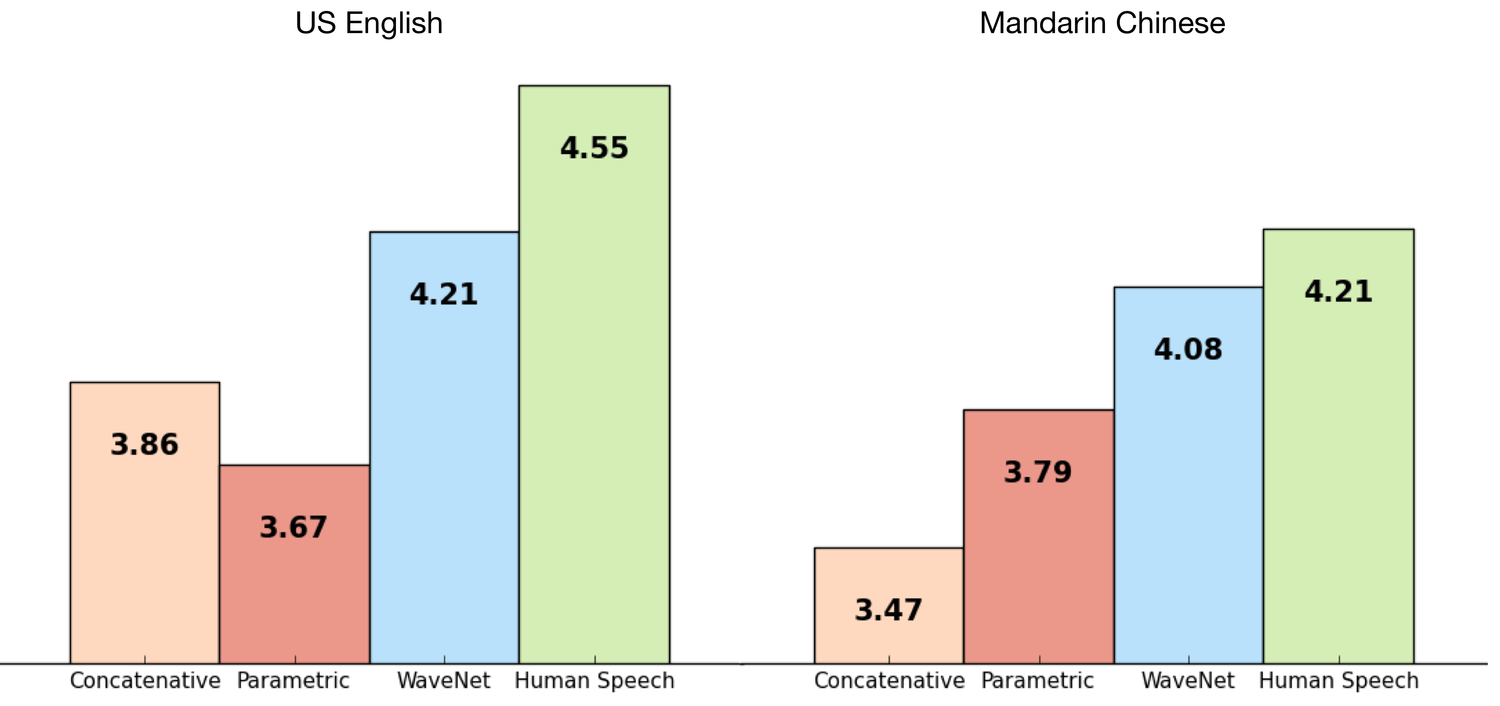

The above diagram shows the relative quality scores assigned by human listeners to the best concatenative and parametric sytems vs. WaveNet and actual recordings.  WaveNet is a significant improvement over previous techniques.

## Music Recognition

- Music recognition systems work by fingerprinting audio files
- They do this by measuring the most prominent frequencies in particular ranges per unit time (a compressed spectrogram)
- When presented a new music snippet they take its fingerprint then do a search for it within the fingerprints of all the songs in the service's library

## Algorithmic Music Synthesis

### History

- The idea of algorithmic music has been around for a long time
- It was popular in Mozart’s time to play the “Dice Game” where a die was used to select the notes of a motive (recurring theme/figure/ditty) or first notes of a composition

#### Illiac Suite

- The first computer-composed material was in 1957: the Illiac Suite (named after the ILLIAC computer) used several computer-generated  parts https://en.wikipedia.org/wiki/Illiac_Suite
- https://www.youtube.com/watch?v=n0njBFLQSk8&index=12&list=RDCgG1HipAayU (played by real orchestra)

#### Cybernetic Composer

- Charles Ames’ Cybernetic Composer (1992) often produced fairly musical results generating music in several styles by following the rules of the genre
- Not a machine learning example though; just random  generation constrained to a grammar
- e.g. http://charlesames.net/cybernetic-composer/Latin%20Jazz%201.mp3 


#### David Cope

- Cope was a Professor of Music at the University of California at Santa Cruz (retired now)
- https://en.wikipedia.org/wiki/David_Cope 
- His primary research area was use of AI for music composition and has been the most successful at it so far
- Started work on Experiments in Musical Intelligence (EMI, pronounced Emmy and he refers to it as “her”) in the early 1980’s
- EMI uses classical AI techniques (no neural nets)

#### EMI and Emily Howell

- His original idea was to code the rules of basic part-writing
- Produced correct but styleless music so he abandoned the approach and started a new program (EMI) based on the idea of “recombinance”: learning from a body of actual works of a composer then recombining them in new but correct ways by learning the voice leading (chord-to-chord progression) rules of the input body of work
- He wanted to ultimately use the system to synthesize new works in his own style to get past a writer’s block
- Started with Bach chorales which he hand-input as MIDI wasn’t quite available yet
- The resulting works were wandering with no overall structure, unbalanced phrases, usually in a single key, no sense of repetition and development we expect
- He then enhanced the analysis (learning) phase of EMI to recognize specific musical structures and idioms (in today’s parlance he hand-crafted a set of features)
- Builds a database of these features (we’d now call it a model) that were used to generate new works by combining the individually correct parts in valid ways
- Subsequent versions of the program through to today have added increasingly elaborate feature recognition and modeling
- Examples (played by a real orchestra): https://www.youtube.com/watch?v=CgG1HipAayU&list=RDCgG1HipAayU&t=128
- He called his successor to EMI "Emily Howell"

#### Neural Nets for Composition

- Dominik Hörnel and Wolfram Menzel conducted some experiments in 1998 using neural nets to attempt to compose works in the style of the Renaissance and Baroque

### Representing Music

- “Common Practice Period” (see https://en.wikipedia.org/wiki/Common_practice_period) music follows many strict rules about how each of the different notes of each chord can move relative to their predecessors and each other; randomly generated notes or chords will quickly give themselves away to a listener as not following the rules we have all subliminally learned from listening to music previously
- Depending on the type of the musical composition there is also a lot of large scale structure that must be respected (see https://en.wikipedia.org/wiki/Symphony and https://en.wikipedia.org/wiki/Sonata)

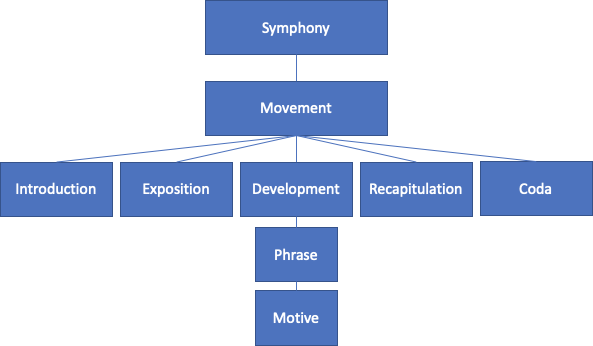

A symphony has typically 3 oto 4 movements that all follow a specific structure (called sonata form):
- Introduction: An opening that may or may not foreshadow what is to come
- Exposition: Introduces a musical theme (motive) that will be the raw material for the next phase
- Development: Builds on the motive by altering it in a number of ways
- Recapitulation: The exposition is repeated (not identically) but represents a return to the familiar after a journey of exploration
- Coda: An optional embellishment at the end

The material is almost always organized into phrases that are no longer than the time a person could sing without taking a breath

### WaveNet for Music

### SampleRNN

- Whereas WaveNet is a convolutional net, SampleRNN is an RNN
- It is a tiered model where each layer effectively runs at a different sample rate and so each layer learns features on a different timescale, from per sample to over several seconds
- Since higher layers run at lower rates they are computationally less intensive (whereas WaveNet layers all run at the full sample rate)
- Here is an example: http://deepsound.io/mp3/samplernn_first/piano.mp3


## Project Magenta

- Magenta is a Google-supported research project to use neural nets for music composition and sound synthesis
- It was started by members of the Google Brain team and now has many other contributors
- https://nsynthsuper.withgoogle.com/
- They are also building new interfaces (instruments) to control their models and open-sourcing the plans: https://github.com/googlecreativelab/open-nsynth-super

### MusicVAE

- State of the art is Magenta MusicVAE (Variational Autoencoder)
- It is a hierarchical RNN
- Can be thought of as a music “compression algorithm”; encodes a piece in a relatively small vector than can be used to reconstruct it or variations on it by varying the vector slightly
- So far less impressive than EMI but learns features rather than having them hand-crafted so more general
- https://codepen.io/adarob/full/gzwJZL/ 
- But months old as of 2018 vs. decades of work put into EMI
- Example at https://magenta.tensorflow.org/music-vae
- https://magenta.tensorflow.org/multitrack
- During training finds a vector of learned features that could conceivably someday allow one to do things like Bach – fugue + sonata to generate a sonata in Bach style
- Currently learns a model of an entire single piece and learns a sequence of sequences to get past RNN’s tendency to focus on recent structure and forget overall or past structure 
- Currently learns 3 parts (drum, bass, melody) as separate streams
- Trained using MIDI file inputs
- Main demo currently is interpolation between sequences: https://experiments.withgoogle.com/ai/beat-blender/view/
- https://experiments.withgoogle.com/ai/beat-blender/view/

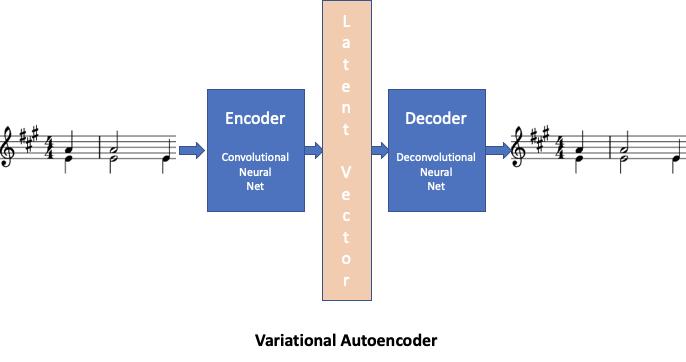

The above diagram shows notes entering the system and passing through an encoder which discovers a compressed form for the input which is encoded in a vector.  The vector can then be decoded to generate a sequence of notes very similar to those input.  By exposing the autoencoder to a variety of input sequences it learns a compact representation for the style of sequences it has been exposed to.

### NSynth

- Rather than generating compositions, NSynth (Neural Synthesizer) is an RNN that learns to generate new sounds from examples it has heard
- Uses a WaveNet-like RNN to synthesize new instruments that combine features of instruments it was trained on
- https://magenta.tensorflow.org/nsynth

## Resources
- https://medium.com/@saxenauts/speech-synthesis-techniques-using-deep-neural-networks-38699e943861
- http://greenteapress.com/wp/think-dsp/
- https://github.com/AllenDowney/ThinkDSP
- https://musicinformationretrieval.com/
- https://librosa.github.io/
- https://github.com/tyiannak/pyAudioAnalysis
- https://deepmind.com/blog/wavenet-generative-model-raw-audio/
- https://www.audacityteam.org/
- http://deepsound.io/
- http://www.gitxiv.com/posts/kQhs4N6rRohXDcp89/samplernn-an-unconditional-end-to-end-neural-audio
- Cope, David. Virtual Music: Computer Synthesis of Musical Style. MIT Press. 2004.
- https://magenta.tensorflow.org/
- https://github.com/ybayle/awesome-deep-learning-music
- https://research.mozilla.org/machine-learning
- https://github.com/robmsmt/KerasDeepSpeech
- https://github.com/ShankHarinath/DeepSpeech2-Keras
- TimbreTron https://www.youtube.com/watch?v=YQAupr7JxNY